<a href="https://colab.research.google.com/github/iu-data-science-python-i590/final-project-team-python-trio/blob/master/Phase1/final_project_phase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analysis of K-means Clustering on Wisconsin Breast Cancer Data

Phase 1.0 | 2018 October 24

Bill Screen, Ha-Lan Nguyen, Tarun Rawat | Indiana University | M.S. Data Science

#### PROBLEM STATEMENT: 
Breast cancer is a rising issue among women. A cancer’s stage is a crucial factor in deciding what treatment options to recommend, and in determining the patient’s prognosis. Today, in the United States, approximately one in eight women over their lifetime has a risk of developing breast cancer. An analysis of the most recent data has shown that the survival rate is 88% after 5 years of diagnosis and 80% after 10 years of diagnosis. With early detection and treatment, it is possible that this type of cancer will go into remission. In such a case, the worse fear of a cancer patient is the recurrence of the cancer.

#### OBJECTIVE: 
This report will demonstrate how implementing a "k-means" algorithm can be used to classify benign and malign cells in two different groups.

### Import Libraries

In [0]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics
from scipy.stats import pearsonr

### Load Data

In [0]:
# Load data file into pandas Dataframe
df = pd.read_csv('breast-cancer-wisconsin.csv')

column_names = df.columns.tolist()
print('Column Names from the data file')
print(str(column_names) + '\n')

# Inspect data
print(df.sample(n=10))

Column Names from the data file
['Scn', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'CLASS']

         Scn  A2  A3  A4  A5  A6  A7  A8  A9  A10  CLASS
181  1204242   1   1   1   1   2   1   1   1    1      2
654  1325159   3   1   1   1   2   1   3   1    1      2
378   657753   3   1   1   4   3   1   2   2    1      2
184  1205579   8   7   6   4   4  10   5   1    1      4
330    76389  10   4   7   2   2   8   6   1    1      4
107  1170420   1   6   8  10   8  10   5   7    1      4
240  1270479   5   1   3   3   2   2   2   3    1      2
169  1199219   1   1   1   2   1   1   1   1    1      2
440   608157  10   4   3  10   4  10  10   1    1      4
34   1075123   3   1   2   1   2   1   2   1    1      2


### Impute missing values

In [0]:
# Set NA character
na_value_char = '?' 

# Check the number of NaN values in the DataFrame before replacement of ? with NaN
print('\n Column A7 contains {0} NaN rows before replacement'.format(df['A7'].isnull().sum()))

# Replace ? by NaN in column A7
df['A7'].replace(na_value_char, value=np.NaN, inplace=True)

# Convert column A7 back to numeric
df['A7'] = pd.to_numeric(df['A7'])

# Check the number of NaN values in the DataFrame after replacement of ? with NaN
print('\n Column A7 contains {0} NaN rows after replacement'.format(df['A7'].isnull().sum()))

# Replace NaN values with the mean of column A7 to the entire DataFrame
df.fillna((df.mean(skipna=True)), inplace=True)

# Convert all columns of DataFrame
df = df.apply(pd.to_numeric)

# Check the number of NaN values in the DataFrame after replacement of NaN with Mean
print('\n Column A7 contains {0} NaN rows after replacement of NaN with Mean'.format(df['A7'].isnull().sum()))


 Column A7 contains 0 NaN rows before replacement

 Column A7 contains 16 NaN rows after replacement

 Column A7 contains 0 NaN rows after replacement of NaN with Mean


### Explore Dataset

In [0]:
# Provide the summary statistics using the describe() function
print('\nDataFrame Summary Statistics:')
print(df.describe())

# Find number of columns and number of rows
print('\nThe Dataframe has {0} rows, and {1} columns'.format(df.shape[0], df.shape[1]))

# Report how many unique values in each column
for column in column_names:
  print('\nColumn {0} has {1} unique values.'.format(column, len(df[column].unique()))) 


DataFrame Summary Statistics:
                Scn          A2          A3          A4          A5  \
count  6.990000e+02  699.000000  699.000000  699.000000  699.000000   
mean   1.071704e+06    4.417740    3.134478    3.207439    2.806867   
std    6.170957e+05    2.815741    3.051459    2.971913    2.855379   
min    6.163400e+04    1.000000    1.000000    1.000000    1.000000   
25%    8.706885e+05    2.000000    1.000000    1.000000    1.000000   
50%    1.171710e+06    4.000000    1.000000    1.000000    1.000000   
75%    1.238298e+06    6.000000    5.000000    5.000000    4.000000   
max    1.345435e+07   10.000000   10.000000   10.000000   10.000000   

               A6          A7          A8          A9         A10       CLASS  
count  699.000000  699.000000  699.000000  699.000000  699.000000  699.000000  
mean     3.216023    3.544656    3.437768    2.866953    1.589413    2.689557  
std      2.214300    3.601852    2.438364    3.053634    1.715078    0.951273  
min      

### Compute data statistics

In [0]:
# Find the mean, median, standard deviation and variance of each of the attributes A2 to A10.

# Set column headers
column_headers = ['Column Name','Mean','Median','Std. Deviation', 'Variance', 'Std. Deviation/Mean']

# Create array of row data
row_data = []

# Iterate over dataset and append column statitics to array
for column in column_names[column_names.index('A2') : column_names.index('A10') + 1]:
  row_data.append([column, df[column].mean(), df[column].median(), df[column].std(), df[column].var(), 
                   round(df[column].std()/df[column].mean(),2)])

# Convert array to DataFrame
stats_df = pd.DataFrame(row_data, columns=column_headers)
stats_df.set_index('Column Name', inplace=True)

# Display results
print(stats_df)

                 Mean  Median  Std. Deviation   Variance  Std. Deviation/Mean
Column Name                                                                  
A2           4.417740     4.0        2.815741   7.928395                 0.64
A3           3.134478     1.0        3.051459   9.311403                 0.97
A4           3.207439     1.0        2.971913   8.832265                 0.93
A5           2.806867     1.0        2.855379   8.153191                 1.02
A6           3.216023     2.0        2.214300   4.903124                 0.69
A7           3.544656     1.0        3.601852  12.973335                 1.02
A8           3.437768     3.0        2.438364   5.945620                 0.71
A9           2.866953     1.0        3.053634   9.324680                 1.07
A10          1.589413     1.0        1.715078   2.941492                 1.08


### Plot basic graphs

#### Histogram

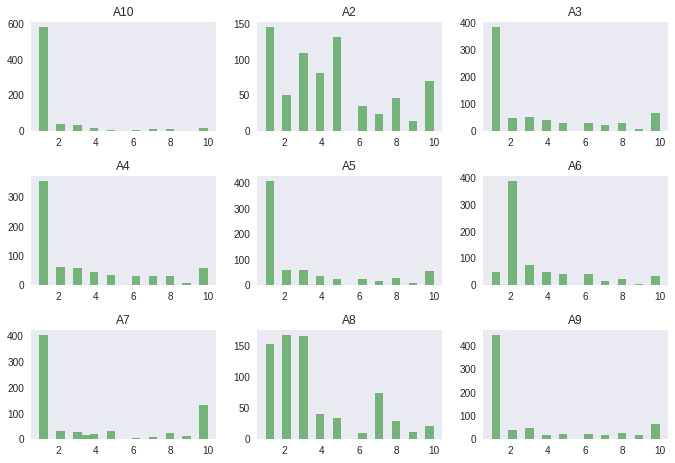

In [0]:
# Plot histograms for attributes A2 to A10 (nine histograms)
index_A2 = list(df.columns).index('A2')
index_A10 = list(df.columns).index('A10') + 1

# Turn grid off in histograms 
hist = df.iloc[:, index_A2:index_A10].hist(bins=20, color="g", alpha=0.5, grid=False)

# Adjust layout to fit better
plt.tight_layout(rect=(0, 0, 1.2, 1.2))
plt.show()

#### Bar Plot

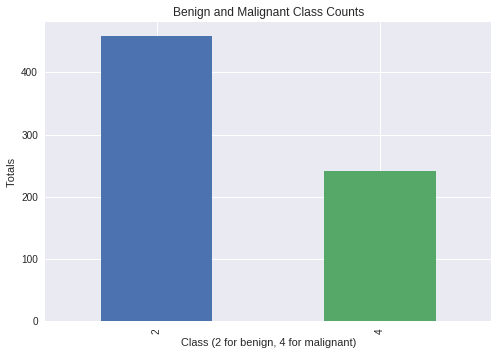

In [0]:
# Draw a bar plot for CLASS to see counts of benign and malignant values 
df.groupby('CLASS').size().plot.bar()
plt.title('Benign and Malignant Class Counts')
plt.xlabel('Class (2 for benign, 4 for malignant)')
plt.ylabel('Totals')
plt.show()

#### Scatter Plots

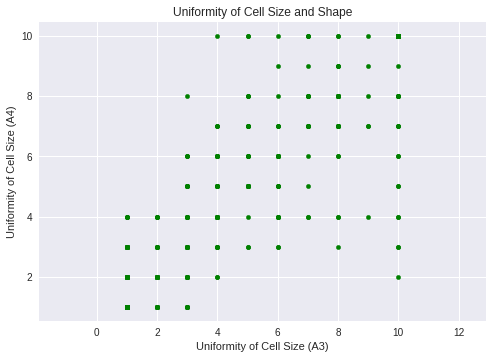

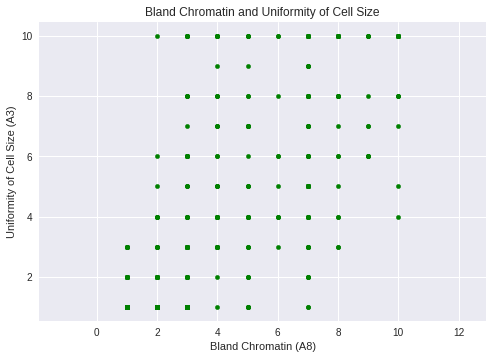

In [0]:
# Draw a scatterplot of any two columns

# 1. Uniformity of Cell Size and Shape
df.plot.scatter(x='A3', y='A4', c='Green')
plt.title('Uniformity of Cell Size and Shape')
plt.xlabel('Uniformity of Cell Size (A3)')
plt.ylabel('Uniformity of Cell Size (A4)')
plt.axis('equal')
plt.show()

print('\n')
 
# 2. Bland Chromatin and Uniformity of Cell Size
df.plot.scatter(x='A8', y='A3', c='Green')
plt.title('Bland Chromatin and Uniformity of Cell Size')
plt.xlabel('Bland Chromatin (A8)')
plt.ylabel('Uniformity of Cell Size (A3)')
plt.axis('equal')
plt.show()

### High Variation Columns

In [0]:
Std_Deviation_over_Mean_upper_limit = 0.9

print('\n\nListing columns with High Variation in values (upper limit of Std. Deviation/ Mean : '
      + str(Std_Deviation_over_Mean_upper_limit) + ' ) which need to be standardized.\n')

print(stats_df[stats_df['Std. Deviation/Mean'] > Std_Deviation_over_Mean_upper_limit][['Mean','Std. Deviation','Std. Deviation/Mean']])




Listing columns with High Variation in values (upper limit of Std. Deviation/ Mean : 0.9 ) which need to be standardized.

                 Mean  Std. Deviation  Std. Deviation/Mean
Column Name                                               
A3           3.134478        3.051459                 0.97
A4           3.207439        2.971913                 0.93
A5           2.806867        2.855379                 1.02
A7           3.544656        3.601852                 1.02
A9           2.866953        3.053634                 1.07
A10          1.589413        1.715078                 1.08


### High Correlation Columns

Identifying Columns with correlation greater than 0.75 and P Value less than 0.05


The P-Value of A3 and A4 is: 8.388647422518441e-264
The Corr value of A3 and A4 is: 0.91


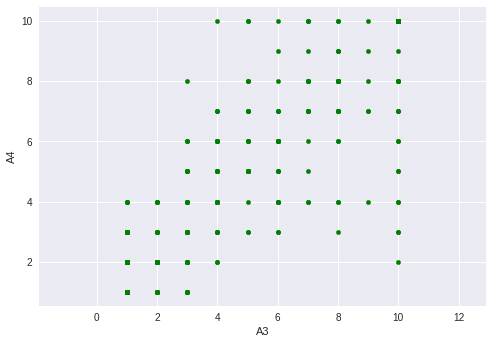



The P-Value of A3 and A6 is: 3.5222494191442436e-128
The Corr value of A3 and A6 is: 0.75


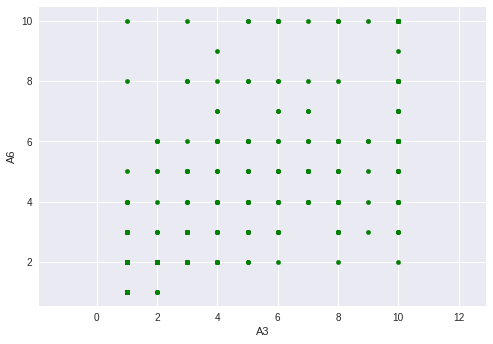



The P-Value of A3 and A8 is: 2.967643454111043e-130
The Corr value of A3 and A8 is: 0.76


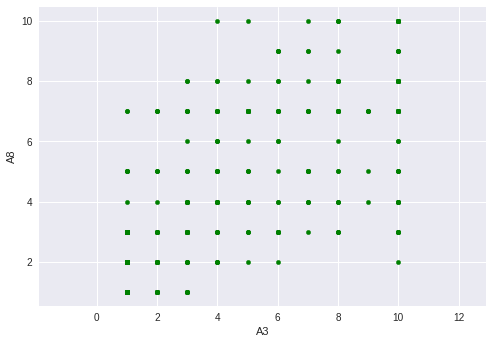



The P-Value of A3 and CLASS is: 1.74792449990722e-169
The Corr value of A3 and CLASS is: 0.82


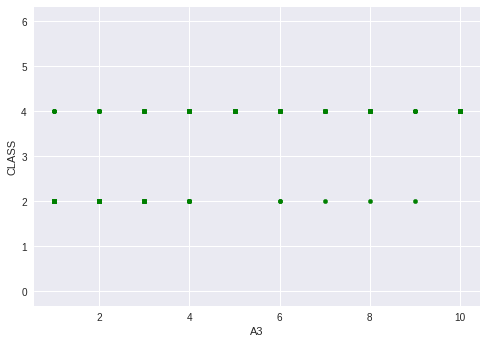



The P-Value of A4 and CLASS is: 2.9456211578465458e-170
The Corr value of A4 and CLASS is: 0.82


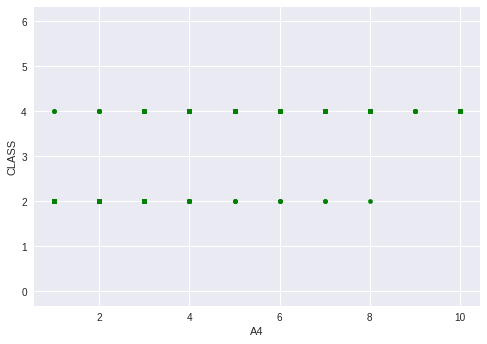



The P-Value of A7 and CLASS is: 4.1890044636786865e-168
The Corr value of A7 and CLASS is: 0.82


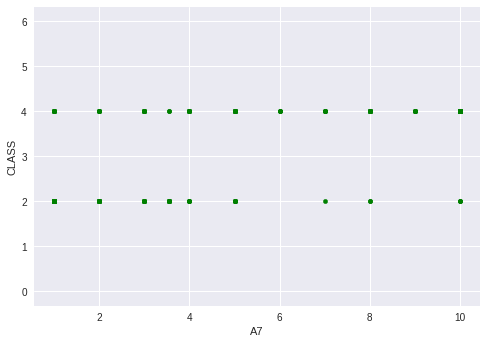



The P-Value of A8 and CLASS is: 9.849140270229808e-131
The Corr value of A8 and CLASS is: 0.76


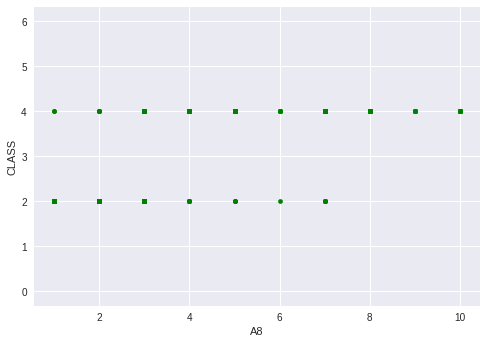

In [0]:
# Evaluate pairwise matrix of columns to visually and statitically for potential correlations

# Set correlation coefficient and P-value to statitically significant limits
correlation_lower_limit = 0.75
p_value_upper_limit = 0.05

print('Identifying Columns with correlation greater than ' + str(correlation_lower_limit)
      +' and P Value less than ' + str(p_value_upper_limit))

for column1 in column_names:
  for column2 in column_names:
    correlation, pvalue = pearsonr(df[column1], df[column2])
    if(abs(correlation) > correlation_lower_limit and abs(correlation) < 1.0 and abs(pvalue) <  p_value_upper_limit and column1 < column2):    
      print('\n\nThe P-Value of {0} and {1} is: {2}'.format(column1, column2, pvalue))
      print('The Corr value of {0} and {1} is: {2}'.format(column1, column2, round(correlation,2)))
      df.plot.scatter(x=column1, y=column2, c='green')
      plt.xlabel(column1)
      plt.ylabel(column2)
      plt.axis('equal')
      plt.show()

### Observations and Summary

Visualizing the distribution of measured columns (A2-A10) in the Wisconsin Breast Cancer data set indicates most columns are right-skewed (positively skewed), which generally signals the mean is greater than the median. Analysis of the categorical data in the 'Class' column reveals the count of benign samples is double that of malignant samples. 

For our scatter plot correlation analysis, we generated a scatter plot for all pairwise measured columns with a correlation coefficient greater than 0.75 and P-Value less than 0.05. Based on the results, we selected two scatter plots with the following pairs of attributes: 
1. Uniformity of Cell Size (A3) and Shape (A4) 
2. Bland Chromatin (A8) and Uniformity of Cell Size (A3). 

Visualization of the scatter plots indicates the Uniformity of Cell Size and Shape scatter plot has a strong linear correlation, whereas the Bland Chromatin and Uniformity of Cell Size scatter plot has a weaker linear correlation.

Using statistic analysis to validate our visual analysis, we confirmed there is a high correlation between Uniformity of Cell Size and Shape measures given a Pearson correlation coefficient of 0.91, and there is a weaker correlation between Bland Chromatin and Uniformity of Cell Size given a Pearson correlation coefficient of 0.76.

Another noteworthy observation is a high correlation between A3 - Class (0.82), A4 - Class (0.82), A7 - Class (0.82) and A8 - Class (0.76), which can help to determine benign and malignant samples based on these attributes of the sampled cells.

In regards to which values might need standardization in the future, the measurements for Marginal Adhesion (A5), Bare Nuclei (A7), Normal Nuclei (A9), and Mitoses (A10) may be candidates for measurement standardization as their Coefficient of Variation (CV) are all greater than 1. Distributions with a CV less than 1.0 are considered to have 'low variance', whereas those with a CV greater than 1.0 are considered to have 'high variance'.
